1. img + text + tabular
2. late fussion
3. without tabluar
4. different weights
5. hybrid

In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/ML-Project/clip_embeddings_multimodal/df_train_clean.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ML-Project/clip_embeddings_multimodal/df_test_clean.csv')

NameError: name 'pd' is not defined

In [ ]:
deletecol = [
    'author',
    'clean_title',
    'created_utc',
    'domain',
    'hasImage',
    'id',
    'image_url',
    'linked_submission_id',
    'subreddit',
    'title',
    '3_way_label',
    '6_way_label'
]
df_train = df_train.drop(columns=deletecol, errors='ignore')
df_test = df_test.drop(columns=deletecol, errors='ignore')


In [ ]:
df_train.sample(2)

,num_comments,score,upvote_ratio,2_way_label
73454,2.0,41,0.87,1
140901,1.0,94,0.92,0


In [ ]:
df_test.sample(2)

,num_comments,score,upvote_ratio,2_way_label
6426,0.0,4,0.76,0
11666,0.0,6,0.75,0


In [ ]:
df_train.describe()

,num_comments,score,upvote_ratio,2_way_label
count,157206.000000,160186.000000,157206.000000,160186.000000
mean,13.677652,578.497971,0.860101,0.508540
std,90.333628,4167.995990,0.108140,0.499929
min,0.000000,-148.000000,0.500000,0.000000
25%,1.000000,7.000000,0.790000,0.000000
50%,3.000000,16.000000,0.880000,1.000000
75%,6.000000,41.000000,0.950000,1.000000
max,6912.000000,137179.000000,1.000000,1.000000


In [ ]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

df_train['num_comments_scaled'] = np.log1p(df_train['num_comments'])
df_test['num_comments_scaled'] = np.log1p(df_test['num_comments'])

yeo = PowerTransformer(method='yeo-johnson')

# Fit on training set
df_train['score_scaled'] = yeo.fit_transform(df_train[['score']])

# Apply same transformation to test set
df_test['score_scaled'] = yeo.transform(df_test[['score']])



In [ ]:
df_train.describe()

,num_comments,score,upvote_ratio,2_way_label,num_comments_scaled,score_scaled
count,157206.000000,160186.000000,157206.000000,160186.000000,157206.000000,1.601860e+05
mean,13.677652,578.497971,0.860101,0.508540,1.379716,2.654788e-17
std,90.333628,4167.995990,0.108140,0.499929,1.175374,1.000003e+00
min,0.000000,-148.000000,0.500000,0.000000,0.000000,-2.177326e+02
25%,1.000000,7.000000,0.790000,0.000000,0.693147,-3.351125e-01
50%,3.000000,16.000000,0.880000,1.000000,1.386294,-2.088422e-01
75%,6.000000,41.000000,0.950000,1.000000,1.945910,-1.271329e-02
max,6912.000000,137179.000000,1.000000,1.000000,8.841159,9.044161e+00


In [ ]:
df_test.describe()

,num_comments,score,upvote_ratio,2_way_label,num_comments_scaled,score_scaled
count,16352.000000,16696.000000,16352.000000,16696.000000,16352.000000,16696.000000
mean,14.679428,618.658840,0.860627,0.506049,1.381318,0.011469
std,158.367384,4407.505596,0.107915,0.499978,1.182892,0.835368
min,0.000000,-18.000000,0.520000,0.000000,0.000000,-7.206192
25%,1.000000,7.000000,0.790000,0.000000,0.693147,-0.335112
50%,3.000000,16.000000,0.880000,1.000000,1.386294,-0.208842
75%,6.000000,42.000000,0.950000,1.000000,1.945910,-0.006840
max,17355.000000,107201.000000,1.000000,1.000000,9.761694,8.318429


In [ ]:
dropcol = ['num_comments','score']
df_train = df_train.drop(columns=dropcol, errors='ignore')
df_test = df_test.drop(columns=dropcol, errors='ignore')

In [ ]:
df_train.isnull().sum()

,0
upvote_ratio,2980
2_way_label,0
num_comments_scaled,2980
score_scaled,0


In [ ]:
df_train['upvote_ratio'].fillna(df_train['upvote_ratio'].mean(), inplace=True)
df_test['num_comments_scaled'].fillna(df_test['num_comments_scaled'].mean(), inplace=True)
df_train['num_comments_scaled'].fillna(df_train['num_comments_scaled'].mean(), inplace=True)
df_test['upvote_ratio'].fillna(df_test['upvote_ratio'].mean(), inplace=True)

/tmp/ipython-input-2693053216.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['upvote_ratio'].fillna(df_train['upvote_ratio'].mean(), inplace=True)
/tmp/ipython-input-2693053216.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [ ]:
df_test.isnull().sum()

,0
upvote_ratio,0
2_way_label,0
num_comments_scaled,0
score_scaled,0


In [ ]:
import numpy as np
x_img_train = np.load('/content/drive/MyDrive/ML-Project/clip_embeddings_multimodal/X_img_train.npy')
x_img_test = np.load('/content/drive/MyDrive/ML-Project/clip_embeddings_multimodal/X_img_test.npy')
x_txt_train = np.load('/content/drive/MyDrive/ML-Project/clip_embeddings_multimodal/X_txt_train.npy')
x_txt_test = np.load('/content/drive/MyDrive/ML-Project/clip_embeddings_multimodal/X_txt_test.npy')

In [ ]:
# Combine embeddings along last axis
x_train_embed = np.concatenate([x_img_train, x_txt_train], axis=1)
x_test_embed  = np.concatenate([x_img_test, x_txt_test], axis=1)


In [ ]:
num_features = ['num_comments_scaled', 'score_scaled', 'upvote_ratio']
# Extract numeric features as numpy arrays
x_train_num = df_train[num_features].to_numpy()
x_test_num  = df_test[num_features].to_numpy()

# Concatenate numeric + multimodal embeddings
X_train_full = np.concatenate([x_train_num, x_train_embed], axis=1)
X_test_full  = np.concatenate([x_test_num,  x_test_embed], axis=1)


In [ ]:
y_train = df_train['2_way_label'].values
y_test  = df_test['2_way_label'].values


early fusion


In [ ]:
import os
import numpy as np
import pandas as pd
import torch

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

from openpyxl import Workbook, load_workbook
from openpyxl.styles import Alignment, Font
from openpyxl.utils import get_column_letter


# =========================
# DEVICE SETUP
# =========================
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🧠 Using device: {device}")


# =========================
# MULTIMODAL TRAINING FUNCTION
# =========================
def train_and_save_models_to_excel(
    X_train, y_train, X_test, y_test,
    model_tag="Early Fusion (Tabular + Image + Text)",
    excel_path="/content/drive/MyDrive/results_local/multimodal_results.xlsx",
    scale_features=False
):
    """
    Train multiple classifiers on fused multimodal embeddings
    and save their performance metrics to an Excel file.
    """

    # Optionally scale features
    if scale_features:
        print("⚙️ Scaling features using StandardScaler...")
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # =========================
    # DEFINE MODELS
    # =========================
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000, multi_class='ovr'),
        # "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
        # "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
        "LightGBM": LGBMClassifier(device="gpu" if device == "cuda" else "cpu"),
        "XGBoost": XGBClassifier(
            tree_method="gpu_hist" if device == "cuda" else "auto",
            gpu_id=0 if device == "cuda" else None,
            use_label_encoder=False,
            eval_metric="logloss"
        ),
        "NaiveBayes": GaussianNB()
    }

    # =========================
    # PREPARE EXCEL FILE
    # =========================
    if os.path.exists(excel_path):
        wb = load_workbook(excel_path)
        ws = wb.active
        next_row = ws.max_row + 2
    else:
        wb = Workbook()
        ws = wb.active
        ws.title = "Model Results"

        # Title
        ws.merge_cells('A1:E1')
        ws['A1'] = model_tag
        ws['A1'].font = Font(size=14, bold=True)
        ws['A1'].alignment = Alignment(horizontal="center")

        headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
        ws.append(headers)
        next_row = ws.max_row + 1

    # =========================
    # TRAIN & EVALUATE
    # =========================
    for name, model in models.items():
        print(f"\n🔄 Training {name}...")
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

            print(f"✅ {name}: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")

            ws.append([name, acc, prec, rec, f1])
        except Exception as e:
            print(f"❌ Error training {name}: {e}")
            ws.append([name, "ERROR", "ERROR", "ERROR", "ERROR"])

    # =========================
    # FORMAT & SAVE
    # =========================
    for col in range(1, 6):
        ws.column_dimensions[get_column_letter(col)].width = 15

    ws.append([])  # Add spacing between result blocks
    wb.save(excel_path)
    print(f"\n📁 Results saved to: {excel_path}")


🧠 Using device: cuda


In [ ]:
train_and_save_models_to_excel(
    X_train_full, y_train,
    X_test_full, y_test,
    model_tag="Early Fusion: Tabular + Image + Text",
    scale_features=True  # good practice for linear models
)


⚙️ Scaling features using StandardScaler...

🔄 Training LogisticRegression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ LogisticRegression: Acc=0.9102, Prec=0.9102, Rec=0.9102, F1=0.9101

🔄 Training LightGBM...
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 261682
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 1027
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 1027 dense feature groups (157.04 MB) transferred to GPU in 0.313812 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ LightGBM: Acc=0.9051, Prec=0.9055, Rec=0.9051, F1=0.9051

🔄 Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:01:54] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:01:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:01:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:02:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist`

✅ XGBoost: Acc=0.9214, Prec=0.9216, Rec=0.9214, F1=0.9214

🔄 Training NaiveBayes...
✅ NaiveBayes: Acc=0.7978, Prec=0.7978, Rec=0.7978, F1=0.7978

📁 Results saved to: /content/drive/MyDrive/results_local/multimodal_results.xlsx


In [ ]:
import os
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, DMatrix, cv

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🧠 Using device: {device}")

def train_optimized_xgboost(
    X_train, y_train, X_test, y_test,
    excel_path="/content/drive/MyDrive/results_local/xgboost_optimized_results.xlsx",
    scale_features=False
):
    if scale_features:
        print("⚙️ Scaling features using StandardScaler...")
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # ======================================
    # XGBOOST PARAMETERS (Tuned for GPU)
    # ======================================
    params = {
        "tree_method": "gpu_hist",  # full GPU acceleration
        "gpu_id": 0,
        "objective": "multi:softmax" if len(np.unique(y_train)) > 2 else "binary:logistic",
        "num_class": len(np.unique(y_train)) if len(np.unique(y_train)) > 2 else None,
        "eval_metric": "mlogloss" if len(np.unique(y_train)) > 2 else "logloss",
        "learning_rate": 0.03,
        "max_depth": 8,
        "min_child_weight": 3,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "reg_alpha": 0.1,  # L1 regularization
        "reg_lambda": 1.0, # L2 regularization
        "n_estimators": 2000,
        "early_stopping_rounds": 50,
        "verbosity": 1,
        "random_state": 42
    }

    # ======================================
    # TRAIN MODEL WITH EARLY STOPPING
    # ======================================
    print("🚀 Training XGBoost with GPU acceleration...")

    model = XGBClassifier(**params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=100
    )

    # ======================================
    # PREDICT & EVALUATE
    # ======================================
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"\n✅ Final XGBoost Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # ======================================
    # SAVE MODEL
    # ======================================
    model.save_model("/content/drive/MyDrive/results_local/xgboost_optimized_model.json")
    print("💾 Model saved to Google Drive.")

    # ======================================
    # SAVE RESULTS TO EXCEL
    # ======================================
    from openpyxl import Workbook, load_workbook
    from openpyxl.styles import Alignment, Font
    from openpyxl.utils import get_column_letter

    if os.path.exists(excel_path):
        wb = load_workbook(excel_path)
        ws = wb.active
    else:
        wb = Workbook()
        ws = wb.active
        ws.title = "XGBoost Results"
        ws.append(["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

    ws.append(["XGBoost Optimized", acc, prec, rec, f1])

    for col in range(1, 6):
        ws.column_dimensions[get_column_letter(col)].width = 15

    wb.save(excel_path)
    print(f"📁 Results saved to: {excel_path}")

    return model


🧠 Using device: cuda


In [ ]:
model = train_optimized_xgboost(X_train_full, y_train,
    X_test_full, y_test,)

print("\n🏁 Training complete!")

🚀 Training XGBoost with GPU acceleration...


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [15:37:01] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [15:37:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()


[0]	validation_0-logloss:0.67702
[100]	validation_0-logloss:0.27850
[200]	validation_0-logloss:0.22504
[300]	validation_0-logloss:0.20306
[400]	validation_0-logloss:0.19085
[500]	validation_0-logloss:0.18278
[600]	validation_0-logloss:0.17701
[700]	validation_0-logloss:0.17225
[800]	validation_0-logloss:0.16881
[900]	validation_0-logloss:0.16592
[1000]	validation_0-logloss:0.16402
[1100]	validation_0-logloss:0.16241
[1200]	validation_0-logloss:0.16122
[1300]	validation_0-logloss:0.16020
[1400]	validation_0-logloss:0.15949
[1500]	validation_0-logloss:0.15897
[1600]	validation_0-logloss:0.15857
[1666]	validation_0-logloss:0.15858


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [15:40:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:729: UserWarning: [15:40:14] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)



✅ Final XGBoost Results:
Accuracy: 0.9362
Precision: 0.9364
Recall: 0.9362
F1 Score: 0.9361
💾 Model saved to Google Drive.
📁 Results saved to: /content/drive/MyDrive/results_local/xgboost_optimized_results.xlsx

🏁 Training complete!


In [ ]:
import os
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import optuna
import xgboost as xgb
from google.colab import drive
from openpyxl import Workbook, load_workbook
from openpyxl.utils import get_column_letter

# =====================================================
# SETUP
# =====================================================
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🧠 Using device: {device}")

# Mount Google Drive
drive.mount("/content/drive", force_remount=True)
os.makedirs("/content/drive/MyDrive/results_local", exist_ok=True)


# =====================================================
# TRAIN FUNCTION
# =====================================================
def train_optimized_xgboost(
    X_train_full, y_train_full, X_test_full, y_test,
    excel_path="/content/drive/MyDrive/results_local/xgboost_optimized_results.xlsx",
    scale_features=False,
    n_trials=10
):
    # =====================================================
    # ✅ Sanity check
    # =====================================================
    print("Checking data consistency...")
    print(f"X_train_full shape: {X_train_full.shape}")
    print(f"y_train_full shape: {y_train_full.shape}")
    print(f"X_test_full shape: {X_test_full.shape}")
    print(f"y_test shape: {y_test.shape}")

    assert X_train_full.shape[0] == len(y_train_full), "❌ Mismatch between X_train_full and y_train_full length!"
    assert X_test_full.shape[0] == len(y_test), "❌ Mismatch between X_test_full and y_test length!"

    # =====================================================
    # ⚙️ Feature scaling
    # =====================================================
    if scale_features:
        print("⚙️ Scaling features using StandardScaler...")
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train_full)
        X_test = scaler.transform(X_test_full)
    else:
        X_train, X_test = X_train_full, X_test_full

    y_train = np.array(y_train_full).ravel()
    y_test = np.array(y_test).ravel()

    num_classes = len(np.unique(y_train))
    objective_name = "multi:softmax" if num_classes > 2 else "binary:logistic"
    eval_metric = "mlogloss" if num_classes > 2 else "logloss"

    # =====================================================
    # 🎯 Define Optuna objective
    # =====================================================
    def objective(trial):
        params = {
            "objective": objective_name,
            "eval_metric": eval_metric,
            "tree_method": "gpu_hist",
            "gpu_id": 0,
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 8),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
            "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
            "n_estimators": 600,
            "verbosity": 0,
            "random_state": 42,
        }

        model = xgb.XGBClassifier(**params)
        kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        f1_scores = []

        for train_idx, val_idx in kf.split(X_train, y_train):
            X_t, X_v = X_train[train_idx], X_train[val_idx]
            y_t, y_v = y_train[train_idx], y_train[val_idx]
            model.fit(X_t, y_t, eval_set=[(X_v, y_v)], verbose=False)
            preds = model.predict(X_v)
            score = f1_score(y_v, preds, average="weighted", zero_division=0)
            f1_scores.append(score)

        return np.mean(f1_scores)

    # =====================================================
    # 🔍 Run Optuna optimization
    # =====================================================
    print(f"🔍 Running Optuna optimization ({n_trials} trials)...")
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    best_params = study.best_params
    print("🏆 Best Parameters:")
    for k, v in best_params.items():
        print(f"   {k}: {v}")

    # =====================================================
    # 🚀 Train final model
    # =====================================================
    best_params.update({
        "objective": objective_name,
        "eval_metric": eval_metric,
        "tree_method": "gpu_hist",
        "gpu_id": 0,
        "n_estimators": 1000,
        "verbosity": 1,
        "random_state": 42,
    })

    print("\n🚀 Training final model with best parameters...")
    model = xgb.XGBClassifier(**best_params)
    model.fit(X_train, y_train)

    # =====================================================
    # 📊 Evaluate
    # =====================================================
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"\n✅ Final XGBoost Results:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    # =====================================================
    # 💾 Save model
    # =====================================================
    model.save_model("/content/drive/MyDrive/results_local/xgboost_optimized_model.json")
    print("💾 Model saved to Google Drive.")

    # =====================================================
    # 📁 Save results to Excel
    # =====================================================
    if os.path.exists(excel_path):
        wb = load_workbook(excel_path)
        ws = wb.active
    else:
        wb = Workbook()
        ws = wb.active
        ws.title = "XGBoost Results"
        ws.append(["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

    ws.append(["XGBoost Optimized", acc, prec, rec, f1])

    for col in range(1, 6):
        ws.column_dimensions[get_column_letter(col)].width = 15

    wb.save(excel_path)
    print(f"📁 Results saved to: {excel_path}")

    print("\n🏁 Training complete!")
    return model


# =====================================================
# ✅ Example Usage
# =====================================================
# Make sure your arrays are numpy arrays (not lists or DataFrames)
X_train_full = np.array(X_train_full)
X_test_full = np.array(X_test_full)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = train_optimized_xgboost(
    X_train_full, y_train,
    X_test_full, y_test,
    scale_features=True,
    n_trials=10
)


🧠 Using device: cuda
Mounted at /content/drive
Checking data consistency...
X_train_full shape: (160186, 1027)
y_train_full shape: (160186,)
X_test_full shape: (16696, 1027)
y_test shape: (16696,)
⚙️ Scaling features using StandardScaler...


[I 2025-10-21 16:08:58,929] A new study created in memory with name: no-name-0ddc5d17-233e-406b-8a69-4c3bd911551c


🔍 Running Optuna optimization (10 trials)...


[I 2025-10-21 16:11:23,363] Trial 0 finished with value: 0.9236620969563898 and parameters: {'learning_rate': 0.2412960131859455, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.9702533105063688, 'colsample_bytree': 0.9469320409846743, 'reg_alpha': 0.6464420675442873, 'reg_lambda': 4.194129205626453}. Best is trial 0 with value: 0.9236620969563898.
[I 2025-10-21 16:13:36,370] Trial 1 finished with value: 0.9160148350824349 and parameters: {'learning_rate': 0.11189704236372373, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.713125171657147, 'colsample_bytree': 0.9149074042177482, 'reg_alpha': 0.9429973143750237, 'reg_lambda': 4.53392152078178}. Best is trial 0 with value: 0.9236620969563898.
[I 2025-10-21 16:17:18,424] Trial 2 finished with value: 0.928355481855882 and parameters: {'learning_rate': 0.14860595117748682, 'max_depth': 7, 'min_child_weight': 3, 'subsample': 0.7176599664538083, 'colsample_bytree': 0.8886444328652388, 'reg_alpha': 0.6540797493167583, 'reg_lambda'

🏆 Best Parameters:
   learning_rate: 0.19323814364857392
   max_depth: 7
   min_child_weight: 2
   subsample: 0.7573096086364286
   colsample_bytree: 0.9716267589056101
   reg_alpha: 0.4447217227456406
   reg_lambda: 3.015207566377878

🚀 Training final model with best parameters...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:44:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [16:46:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:



✅ Final XGBoost Results:
Accuracy:  0.9362
Precision: 0.9364
Recall:    0.9362
F1 Score:  0.9362
💾 Model saved to Google Drive.
📁 Results saved to: /content/drive/MyDrive/results_local/xgboost_optimized_results.xlsx

🏁 Training complete!


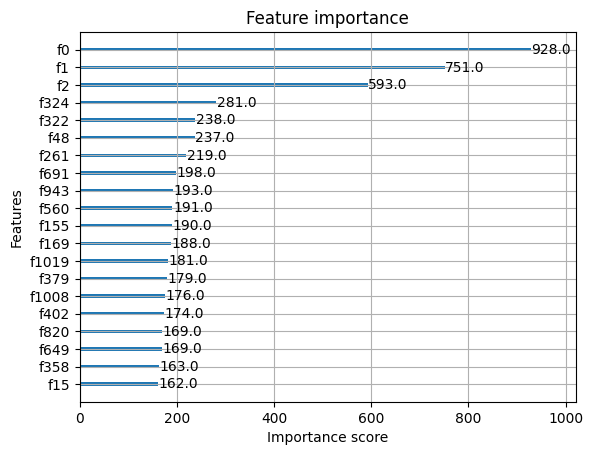

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, max_num_features=20)
plt.show()


[[5006 3241]
 [5268 3181]]


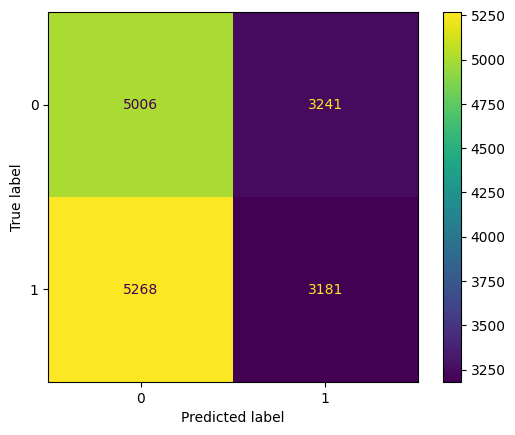

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test, model.predict(X_test_full))
y_pred = model.predict(X_test_full)
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
print(model.classes_)


[0 1]


In [ ]:
print("X_train_full shape:", X_train_full.shape)
print("y_train shape:", y_train.shape)
print("X_test_full shape:", X_test_full.shape)
print("y_test shape:", y_test.shape)


X_train_full shape: (160186, 1027)
y_train shape: (160186,)
X_test_full shape: (16696, 1027)
y_test shape: (16696,)




```
# This is formatted as code
```

late fusion
"""
  Late fusion: trains multiple models per modality, fuses predictions,
  and records all performance metrics in Excel.
  """

In [ ]:
import os
import numpy as np
import torch

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

from openpyxl import Workbook, load_workbook
from openpyxl.styles import Alignment, Font
from openpyxl.utils import get_column_letter


device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🧠 Using device: {device}")


def late_fusion_multi_model(
    x_img_train, x_img_test,
    x_txt_train, x_txt_test,
    x_tab_train, x_tab_test,
    y_train, y_test,
    excel_path="/content/drive/MyDrive/results_local/multimodal_results.xlsx",
    fusion_weights=(0.4, 0.4, 0.2)
):
    """
    Late fusion: trains multiple models per modality, fuses predictions,
    and records all performance metrics in Excel.
    """

    # =======================
    # DEFINE MODELS
    # =======================
    base_models = {
        "XGBoost": XGBClassifier(
            tree_method="gpu_hist" if device == "cuda" else "hist",
            gpu_id=0 if device == "cuda" else None,
            use_label_encoder=False,
            eval_metric="logloss",
            n_estimators=800,
            learning_rate=0.05
        ),
        "LightGBM": LGBMClassifier(
            n_estimators=1000, learning_rate=0.05,
            device="gpu" if device == "cuda" else "cpu"
        ),
        "LogisticRegression": LogisticRegression(max_iter=1000, solver="saga", n_jobs=-1),
        # "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=15, n_jobs=-1, random_state=42),
        # "ExtraTrees": ExtraTreesClassifier(n_estimators=100, max_depth=15, n_jobs=-1, random_state=42),
        "NaiveBayes": GaussianNB()
    }

    # Prepare Excel
    if os.path.exists(excel_path):
        wb = load_workbook(excel_path)
        ws = wb.active
    else:
        wb = Workbook()
        ws = wb.active
        ws.title = "Late Fusion Results"
        ws.append(["Fusion Setup", "Accuracy", "Precision", "Recall", "F1 Score"])

    w_img, w_txt, w_tab = fusion_weights

    # =======================
    # TRAIN MODELS PER MODALITY
    # =======================
    results = []

    for img_name, img_model in base_models.items():
        for txt_name, txt_model in base_models.items():
            for tab_name, tab_model in base_models.items():
                setup_name = f"Img:{img_name} | Txt:{txt_name} | Tab:{tab_name}"

                try:
                    print(f"\n🔹 Training setup: {setup_name}")

                    # ---- Image ----
                    img_model.fit(x_img_train, y_train)
                    img_pred = img_model.predict_proba(x_img_test)[:, 1]

                    # ---- Text ----
                    txt_model.fit(x_txt_train, y_train)
                    txt_pred = txt_model.predict_proba(x_txt_test)[:, 1]

                    # ---- Tabular ----
                    scaler = StandardScaler()
                    x_tab_train_scaled = scaler.fit_transform(x_tab_train)
                    x_tab_test_scaled = scaler.transform(x_tab_test)
                    tab_model.fit(x_tab_train_scaled, y_train)
                    tab_pred = tab_model.predict_proba(x_tab_test_scaled)[:, 1]

                    # ---- Fusion ----
                    fused_pred = (
                        w_img * img_pred +
                        w_txt * txt_pred +
                        w_tab * tab_pred
                    )
                    fused_pred_label = (fused_pred >= 0.5).astype(int)

                    acc = accuracy_score(y_test, fused_pred_label)
                    prec = precision_score(y_test, fused_pred_label, average='weighted', zero_division=0)
                    rec = recall_score(y_test, fused_pred_label, average='weighted', zero_division=0)
                    f1 = f1_score(y_test, fused_pred_label, average='weighted', zero_division=0)

                    results.append((setup_name, acc, prec, rec, f1))
                    ws.append([setup_name, acc, prec, rec, f1])
                    print(f"✅ {setup_name} → Acc={acc:.4f}, F1={f1:.4f}")

                except Exception as e:
                    print(f"❌ Error in {setup_name}: {e}")
                    ws.append([setup_name, "ERROR", "ERROR", "ERROR", "ERROR"])

                wb.save(excel_path)

    # =======================
    # FIND BEST SETUP
    # =======================
    results_df = pd.DataFrame(results, columns=["Setup", "Accuracy", "Precision", "Recall", "F1"])
    best_row = results_df.loc[results_df["F1"].idxmax()]
    print("\n🏆 Best Late Fusion Configuration:")
    print(best_row)

    ws.append([])
    ws.append(["BEST MODEL", best_row["Setup"], best_row["Accuracy"], best_row["Precision"], best_row["Recall"], best_row["F1"]])
    wb.save(excel_path)
    print(f"\n📁 Results saved and best configuration recorded to: {excel_path}")


🧠 Using device: cuda


In [ ]:
late_fusion_multi_model(
    x_img_train, x_img_test,
    x_txt_train, x_txt_test,
    df_train[['num_comments_scaled','score_scaled','upvote_ratio']],
    df_test[['num_comments_scaled','score_scaled','upvote_ratio']],
    y_train, y_test,
    fusion_weights=(0.4, 0.4, 0.2)
)



🔹 Training setup: Img:XGBoost | Txt:XGBoost | Tab:XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:09:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:09:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:09:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/training

✅ Img:XGBoost | Txt:XGBoost | Tab:XGBoost → Acc=0.9121, F1=0.9120

🔹 Training setup: Img:XGBoost | Txt:XGBoost | Tab:LightGBM


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:10:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:10:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:11:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/training

[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 3
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.61 MB) transferred to GPU in 0.001466 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:XGBoost | Txt:XGBoost | Tab:LightGBM → Acc=0.9114, F1=0.9113

🔹 Training setup: Img:XGBoost | Txt:XGBoost | Tab:LogisticRegression


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:12:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:12:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:12:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/training

✅ Img:XGBoost | Txt:XGBoost | Tab:LogisticRegression → Acc=0.9037, F1=0.9036

🔹 Training setup: Img:XGBoost | Txt:XGBoost | Tab:NaiveBayes


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:13:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:13:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:13:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/training

✅ Img:XGBoost | Txt:XGBoost | Tab:NaiveBayes → Acc=0.8990, F1=0.8988

🔹 Training setup: Img:XGBoost | Txt:LightGBM | Tab:XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:14:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:14:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:15:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.166889 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:17:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:17:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:17:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter 

✅ Img:XGBoost | Txt:LightGBM | Tab:XGBoost → Acc=0.9124, F1=0.9123

🔹 Training setup: Img:XGBoost | Txt:LightGBM | Tab:LightGBM


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:17:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:17:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:18:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.175070 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 3
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.61 MB) transferred to GPU in 0.001917 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:XGBoost | Txt:LightGBM | Tab:LightGBM → Acc=0.9118, F1=0.9117

🔹 Training setup: Img:XGBoost | Txt:LightGBM | Tab:LogisticRegression


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:21:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:21:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:21:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.152636 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:XGBoost | Txt:LightGBM | Tab:LogisticRegression → Acc=0.9030, F1=0.9029

🔹 Training setup: Img:XGBoost | Txt:LightGBM | Tab:NaiveBayes


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:24:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:24:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:24:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.316901 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:XGBoost | Txt:LightGBM | Tab:NaiveBayes → Acc=0.8982, F1=0.8981

🔹 Training setup: Img:XGBoost | Txt:LogisticRegression | Tab:XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:27:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:27:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:27:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/training

✅ Img:XGBoost | Txt:LogisticRegression | Tab:XGBoost → Acc=0.9081, F1=0.9080

🔹 Training setup: Img:XGBoost | Txt:LogisticRegression | Tab:LightGBM


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:28:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:28:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:28:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 3
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.61 MB) transferred to GPU in 0.001535 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:XGBoost | Txt:LogisticRegression | Tab:LightGBM → Acc=0.9078, F1=0.9078

🔹 Training setup: Img:XGBoost | Txt:LogisticRegression | Tab:LogisticRegression


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:29:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:29:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:30:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


✅ Img:XGBoost | Txt:LogisticRegression | Tab:LogisticRegression → Acc=0.8975, F1=0.8974

🔹 Training setup: Img:XGBoost | Txt:LogisticRegression | Tab:NaiveBayes


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:30:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:30:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:31:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


✅ Img:XGBoost | Txt:LogisticRegression | Tab:NaiveBayes → Acc=0.8921, F1=0.8919

🔹 Training setup: Img:XGBoost | Txt:NaiveBayes | Tab:XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:32:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:32:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:32:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/training

✅ Img:XGBoost | Txt:NaiveBayes | Tab:XGBoost → Acc=0.8061, F1=0.8010

🔹 Training setup: Img:XGBoost | Txt:NaiveBayes | Tab:LightGBM


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:32:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:32:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:33:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 3
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.61 MB) transferred to GPU in 0.001539 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:XGBoost | Txt:NaiveBayes | Tab:LightGBM → Acc=0.8050, F1=0.7998

🔹 Training setup: Img:XGBoost | Txt:NaiveBayes | Tab:LogisticRegression


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:34:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:34:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:34:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


✅ Img:XGBoost | Txt:NaiveBayes | Tab:LogisticRegression → Acc=0.7938, F1=0.7876

🔹 Training setup: Img:XGBoost | Txt:NaiveBayes | Tab:NaiveBayes


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:34:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:34:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:35:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


✅ Img:XGBoost | Txt:NaiveBayes | Tab:NaiveBayes → Acc=0.7761, F1=0.7681

🔹 Training setup: Img:LightGBM | Txt:XGBoost | Tab:XGBoost
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.169331 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:38:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:38:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:38:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter 

✅ Img:LightGBM | Txt:XGBoost | Tab:XGBoost → Acc=0.9118, F1=0.9118

🔹 Training setup: Img:LightGBM | Txt:XGBoost | Tab:LightGBM
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.297412 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:41:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:41:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:41:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter 

[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 3
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.61 MB) transferred to GPU in 0.001481 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LightGBM | Txt:XGBoost | Tab:LightGBM → Acc=0.9115, F1=0.9115

🔹 Training setup: Img:LightGBM | Txt:XGBoost | Tab:LogisticRegression
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.159659 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:44:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:44:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:44:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter 

✅ Img:LightGBM | Txt:XGBoost | Tab:LogisticRegression → Acc=0.9022, F1=0.9021

🔹 Training setup: Img:LightGBM | Txt:XGBoost | Tab:NaiveBayes
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.153317 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:47:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:47:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:47:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter 

✅ Img:LightGBM | Txt:XGBoost | Tab:NaiveBayes → Acc=0.8983, F1=0.8982

🔹 Training setup: Img:LightGBM | Txt:LightGBM | Tab:XGBoost
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.317046 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.158177 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:52:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:52:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [05:52:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter 

✅ Img:LightGBM | Txt:LightGBM | Tab:XGBoost → Acc=0.9121, F1=0.9121

🔹 Training setup: Img:LightGBM | Txt:LightGBM | Tab:LightGBM
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.166082 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.150301 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 3
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.61 MB) transferred to GPU in 0.002310 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LightGBM | Txt:LightGBM | Tab:LightGBM → Acc=0.9114, F1=0.9113

🔹 Training setup: Img:LightGBM | Txt:LightGBM | Tab:LogisticRegression
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.155316 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.153243 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LightGBM | Txt:LightGBM | Tab:LogisticRegression → Acc=0.9030, F1=0.9029

🔹 Training setup: Img:LightGBM | Txt:LightGBM | Tab:NaiveBayes
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.154050 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.153809 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LightGBM | Txt:LightGBM | Tab:NaiveBayes → Acc=0.8975, F1=0.8974

🔹 Training setup: Img:LightGBM | Txt:LogisticRegression | Tab:XGBoost
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.164086 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:09:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:09:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [06:09:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter 

✅ Img:LightGBM | Txt:LogisticRegression | Tab:XGBoost → Acc=0.9070, F1=0.9069

🔹 Training setup: Img:LightGBM | Txt:LogisticRegression | Tab:LightGBM
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.327547 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 3
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.61 MB) transferred to GPU in 0.001511 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LightGBM | Txt:LogisticRegression | Tab:LightGBM → Acc=0.9071, F1=0.9070

🔹 Training setup: Img:LightGBM | Txt:LogisticRegression | Tab:LogisticRegression
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.318550 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LightGBM | Txt:LogisticRegression | Tab:LogisticRegression → Acc=0.8976, F1=0.8975

🔹 Training setup: Img:LightGBM | Txt:LogisticRegression | Tab:NaiveBayes
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.151292 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LightGBM | Txt:LogisticRegression | Tab:NaiveBayes → Acc=0.8920, F1=0.8918

🔹 Training setup: Img:LightGBM | Txt:NaiveBayes | Tab:XGBoost
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.155353 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:20:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:20:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [06:20:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter 

✅ Img:LightGBM | Txt:NaiveBayes | Tab:XGBoost → Acc=0.8049, F1=0.7997

🔹 Training setup: Img:LightGBM | Txt:NaiveBayes | Tab:LightGBM
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.155794 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 3
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.61 MB) transferred to GPU in 0.001524 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LightGBM | Txt:NaiveBayes | Tab:LightGBM → Acc=0.8037, F1=0.7984

🔹 Training setup: Img:LightGBM | Txt:NaiveBayes | Tab:LogisticRegression
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.148820 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LightGBM | Txt:NaiveBayes | Tab:LogisticRegression → Acc=0.7922, F1=0.7859

🔹 Training setup: Img:LightGBM | Txt:NaiveBayes | Tab:NaiveBayes
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.150287 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LightGBM | Txt:NaiveBayes | Tab:NaiveBayes → Acc=0.7747, F1=0.7665

🔹 Training setup: Img:LogisticRegression | Txt:XGBoost | Tab:XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:28:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:28:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [06:28:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/training

✅ Img:LogisticRegression | Txt:XGBoost | Tab:XGBoost → Acc=0.9107, F1=0.9106

🔹 Training setup: Img:LogisticRegression | Txt:XGBoost | Tab:LightGBM


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:29:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:29:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [06:30:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 3
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.61 MB) transferred to GPU in 0.001380 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LogisticRegression | Txt:XGBoost | Tab:LightGBM → Acc=0.9106, F1=0.9106

🔹 Training setup: Img:LogisticRegression | Txt:XGBoost | Tab:LogisticRegression


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:31:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:31:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [06:31:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


✅ Img:LogisticRegression | Txt:XGBoost | Tab:LogisticRegression → Acc=0.9020, F1=0.9019

🔹 Training setup: Img:LogisticRegression | Txt:XGBoost | Tab:NaiveBayes


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:32:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:32:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [06:32:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


✅ Img:LogisticRegression | Txt:XGBoost | Tab:NaiveBayes → Acc=0.8969, F1=0.8968

🔹 Training setup: Img:LogisticRegression | Txt:LightGBM | Tab:XGBoost
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.168154 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:35:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:35:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [06:35:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter 

✅ Img:LogisticRegression | Txt:LightGBM | Tab:XGBoost → Acc=0.9105, F1=0.9104

🔹 Training setup: Img:LogisticRegression | Txt:LightGBM | Tab:LightGBM
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.157814 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 3
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.61 MB) transferred to GPU in 0.001508 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LogisticRegression | Txt:LightGBM | Tab:LightGBM → Acc=0.9106, F1=0.9106

🔹 Training setup: Img:LogisticRegression | Txt:LightGBM | Tab:LogisticRegression
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.154001 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LogisticRegression | Txt:LightGBM | Tab:LogisticRegression → Acc=0.9026, F1=0.9025

🔹 Training setup: Img:LogisticRegression | Txt:LightGBM | Tab:NaiveBayes
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.152403 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LogisticRegression | Txt:LightGBM | Tab:NaiveBayes → Acc=0.8983, F1=0.8982

🔹 Training setup: Img:LogisticRegression | Txt:LogisticRegression | Tab:XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:44:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:44:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [06:44:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


✅ Img:LogisticRegression | Txt:LogisticRegression | Tab:XGBoost → Acc=0.9051, F1=0.9051

🔹 Training setup: Img:LogisticRegression | Txt:LogisticRegression | Tab:LightGBM
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 3
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.61 MB) transferred to GPU in 0.001492 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LogisticRegression | Txt:LogisticRegression | Tab:LightGBM → Acc=0.9049, F1=0.9048

🔹 Training setup: Img:LogisticRegression | Txt:LogisticRegression | Tab:LogisticRegression
✅ Img:LogisticRegression | Txt:LogisticRegression | Tab:LogisticRegression → Acc=0.8973, F1=0.8973

🔹 Training setup: Img:LogisticRegression | Txt:LogisticRegression | Tab:NaiveBayes
✅ Img:LogisticRegression | Txt:LogisticRegression | Tab:NaiveBayes → Acc=0.8920, F1=0.8918

🔹 Training setup: Img:LogisticRegression | Txt:NaiveBayes | Tab:XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:48:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:48:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [06:48:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


✅ Img:LogisticRegression | Txt:NaiveBayes | Tab:XGBoost → Acc=0.8015, F1=0.7959

🔹 Training setup: Img:LogisticRegression | Txt:NaiveBayes | Tab:LightGBM
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 3
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.61 MB) transferred to GPU in 0.001377 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LogisticRegression | Txt:NaiveBayes | Tab:LightGBM → Acc=0.8001, F1=0.7944

🔹 Training setup: Img:LogisticRegression | Txt:NaiveBayes | Tab:LogisticRegression
✅ Img:LogisticRegression | Txt:NaiveBayes | Tab:LogisticRegression → Acc=0.7882, F1=0.7815

🔹 Training setup: Img:LogisticRegression | Txt:NaiveBayes | Tab:NaiveBayes
✅ Img:LogisticRegression | Txt:NaiveBayes | Tab:NaiveBayes → Acc=0.7705, F1=0.7617

🔹 Training setup: Img:NaiveBayes | Txt:XGBoost | Tab:XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:51:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:51:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [06:51:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/training

✅ Img:NaiveBayes | Txt:XGBoost | Tab:XGBoost → Acc=0.7714, F1=0.7653

🔹 Training setup: Img:NaiveBayes | Txt:XGBoost | Tab:LightGBM


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:52:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:52:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [06:52:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 3
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.61 MB) transferred to GPU in 0.001469 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:NaiveBayes | Txt:XGBoost | Tab:LightGBM → Acc=0.7718, F1=0.7658

🔹 Training setup: Img:NaiveBayes | Txt:XGBoost | Tab:LogisticRegression


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:53:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:53:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [06:53:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


✅ Img:NaiveBayes | Txt:XGBoost | Tab:LogisticRegression → Acc=0.7381, F1=0.7284

🔹 Training setup: Img:NaiveBayes | Txt:XGBoost | Tab:NaiveBayes


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:54:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:54:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [06:54:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


✅ Img:NaiveBayes | Txt:XGBoost | Tab:NaiveBayes → Acc=0.7283, F1=0.7178

🔹 Training setup: Img:NaiveBayes | Txt:LightGBM | Tab:XGBoost
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.148622 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:57:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:57:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [06:57:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter 

✅ Img:NaiveBayes | Txt:LightGBM | Tab:XGBoost → Acc=0.7687, F1=0.7624

🔹 Training setup: Img:NaiveBayes | Txt:LightGBM | Tab:LightGBM
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.151790 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 3
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.61 MB) transferred to GPU in 0.001458 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:NaiveBayes | Txt:LightGBM | Tab:LightGBM → Acc=0.7680, F1=0.7616

🔹 Training setup: Img:NaiveBayes | Txt:LightGBM | Tab:LogisticRegression
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.322473 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:NaiveBayes | Txt:LightGBM | Tab:LogisticRegression → Acc=0.7346, F1=0.7245

🔹 Training setup: Img:NaiveBayes | Txt:LightGBM | Tab:NaiveBayes
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.149163 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:NaiveBayes | Txt:LightGBM | Tab:NaiveBayes → Acc=0.7247, F1=0.7135

🔹 Training setup: Img:NaiveBayes | Txt:LogisticRegression | Tab:XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:05:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:05:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [07:05:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


✅ Img:NaiveBayes | Txt:LogisticRegression | Tab:XGBoost → Acc=0.7585, F1=0.7512

🔹 Training setup: Img:NaiveBayes | Txt:LogisticRegression | Tab:LightGBM
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 3
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.61 MB) transferred to GPU in 0.001456 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:NaiveBayes | Txt:LogisticRegression | Tab:LightGBM → Acc=0.7579, F1=0.7506

🔹 Training setup: Img:NaiveBayes | Txt:LogisticRegression | Tab:LogisticRegression
✅ Img:NaiveBayes | Txt:LogisticRegression | Tab:LogisticRegression → Acc=0.7241, F1=0.7126

🔹 Training setup: Img:NaiveBayes | Txt:LogisticRegression | Tab:NaiveBayes
✅ Img:NaiveBayes | Txt:LogisticRegression | Tab:NaiveBayes → Acc=0.7126, F1=0.7000

🔹 Training setup: Img:NaiveBayes | Txt:NaiveBayes | Tab:XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:08:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:08:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [07:08:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


✅ Img:NaiveBayes | Txt:NaiveBayes | Tab:XGBoost → Acc=0.8180, F1=0.8180

🔹 Training setup: Img:NaiveBayes | Txt:NaiveBayes | Tab:LightGBM
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 3
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.61 MB) transferred to GPU in 0.001380 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:NaiveBayes | Txt:NaiveBayes | Tab:LightGBM → Acc=0.8173, F1=0.8173

🔹 Training setup: Img:NaiveBayes | Txt:NaiveBayes | Tab:LogisticRegression
✅ Img:NaiveBayes | Txt:NaiveBayes | Tab:LogisticRegression → Acc=0.7873, F1=0.7873

🔹 Training setup: Img:NaiveBayes | Txt:NaiveBayes | Tab:NaiveBayes
✅ Img:NaiveBayes | Txt:NaiveBayes | Tab:NaiveBayes → Acc=0.7787, F1=0.7786

🏆 Best Late Fusion Configuration:
Setup        Img:XGBoost | Txt:LightGBM | Tab:XGBoost
Accuracy                                     0.912374
Precision                                    0.913278
Recall                                       0.912374
F1                                           0.912298
Name: 4, dtype: object

📁 Results saved and best configuration recorded to: /content/drive/MyDrive/results_local/multimodal_results.xlsx


In [ ]:
df_train.corr()


,upvote_ratio,2_way_label,num_comments_scaled,score_scaled
upvote_ratio,1.000000,-0.294226,0.116341,0.243826
2_way_label,-0.294226,1.000000,0.270341,-0.029932
num_comments_scaled,0.116341,0.270341,1.000000,0.557342
score_scaled,0.243826,-0.029932,0.557342,1.000000




```
`# This is formatted as code`
```

without tabluar
"""
  Late fusion: trains multiple models per modality (image, text),
  fuses predictions, and records metrics in Excel.
   """

In [ ]:
import os
import numpy as np
import pandas as pd
import torch

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from openpyxl import Workbook, load_workbook
from openpyxl.styles import Alignment, Font
from openpyxl.utils import get_column_letter


device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🧠 Using device: {device}")


def late_fusion_img_txt(
    x_img_train, x_img_test,
    x_txt_train, x_txt_test,
    y_train, y_test,
    excel_path="/content/drive/MyDrive/results_local/multimodal_results.xlsx",
    # fusion_weights=(0.5, 0.5)
    fusion_weights=(0.5, 0.5)
):
    """
    Late fusion: trains multiple models per modality (image, text),
    fuses predictions, and records metrics in Excel.
    """

    # =======================
    # DEFINE MODELS
    # =======================
    base_models = {
        "XGBoost": XGBClassifier(
            tree_method="gpu_hist" if device == "cuda" else "hist",
            gpu_id=0 if device == "cuda" else None,
            use_label_encoder=False,
            eval_metric="logloss",
            n_estimators=800,
            learning_rate=0.05
        ),
        "LightGBM": LGBMClassifier(
            n_estimators=1000, learning_rate=0.05,
            device="gpu" if device == "cuda" else "cpu"
        ),
        "LogisticRegression": LogisticRegression(max_iter=1000, solver="saga", n_jobs=-1),
        # "NaiveBayes": GaussianNB()
    }

    # =======================
    # PREPARE EXCEL
    # =======================
    if os.path.exists(excel_path):
        wb = load_workbook(excel_path)
        ws = wb.active
    else:
        wb = Workbook()
        ws = wb.active
        ws.title = "Late Fusion (Img+Txt)"
        ws.append(["Fusion Setup", "Accuracy", "Precision", "Recall", "F1 Score"])

    w_img, w_txt = fusion_weights
    results = []

    # =======================
    # TRAIN MODELS
    # =======================
    for img_name, img_model in base_models.items():
        for txt_name, txt_model in base_models.items():
            setup_name = f"Img:{img_name} | Txt:{txt_name}"
            try:
                print(f"\n🔹 Training setup: {setup_name}")

                # ---- Image model ----
                img_model.fit(x_img_train, y_train)
                img_pred = img_model.predict_proba(x_img_test)[:, 1]

                # ---- Text model ----
                txt_model.fit(x_txt_train, y_train)
                txt_pred = txt_model.predict_proba(x_txt_test)[:, 1]

                # ---- Late Fusion ----
                fused_pred = (w_img * img_pred + w_txt * txt_pred)
                fused_pred_label = (fused_pred >= 0.5).astype(int)

                # ---- Metrics ----
                acc = accuracy_score(y_test, fused_pred_label)
                prec = precision_score(y_test, fused_pred_label, average='weighted', zero_division=0)
                rec = recall_score(y_test, fused_pred_label, average='weighted', zero_division=0)
                f1 = f1_score(y_test, fused_pred_label, average='weighted', zero_division=0)

                results.append((setup_name, acc, prec, rec, f1))
                ws.append([setup_name, acc, prec, rec, f1])
                print(f"✅ {setup_name} → Acc={acc:.4f}, F1={f1:.4f}")

            except Exception as e:
                print(f"❌ Error in {setup_name}: {e}")
                ws.append([setup_name, "ERROR", "ERROR", "ERROR", "ERROR"])

            wb.save(excel_path)

    # =======================
    # FIND BEST SETUP
    # =======================
    results_df = pd.DataFrame(results, columns=["Setup", "Accuracy", "Precision", "Recall", "F1"])
    best_row = results_df.loc[results_df["F1"].idxmax()]
    print("\n🏆 Best Late Fusion Configuration:")
    print(best_row)

    ws.append([])
    ws.append(["BEST MODEL", best_row["Setup"], best_row["Accuracy"], best_row["Precision"], best_row["Recall"], best_row["F1"]])
    wb.save(excel_path)
    print(f"\n📁 Results saved and best configuration recorded to: {excel_path}")


🧠 Using device: cuda


In [ ]:
late_fusion_img_txt(
    x_img_train, x_img_test,
    x_txt_train, x_txt_test,
    y_train, y_test,
    excel_path="/content/drive/MyDrive/results_local/multimodal_results.xlsx",
    fusion_weights=(0.5, 0.5)  # try also (0.6, 0.4) or (0.7, 0.3)
)



🔹 Training setup: Img:XGBoost | Txt:XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:22:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:22:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [07:23:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/training

✅ Img:XGBoost | Txt:XGBoost → Acc=0.8915, F1=0.8914

🔹 Training setup: Img:XGBoost | Txt:LightGBM


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:24:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:24:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [07:24:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.145896 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:XGBoost | Txt:LightGBM → Acc=0.8904, F1=0.8903

🔹 Training setup: Img:XGBoost | Txt:LogisticRegression


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:27:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:27:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [07:27:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


✅ Img:XGBoost | Txt:LogisticRegression → Acc=0.8858, F1=0.8858

🔹 Training setup: Img:LightGBM | Txt:XGBoost
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.331621 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:30:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:30:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [07:30:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter 

✅ Img:LightGBM | Txt:XGBoost → Acc=0.8930, F1=0.8929

🔹 Training setup: Img:LightGBM | Txt:LightGBM
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.151280 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.169389 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LightGBM | Txt:LightGBM → Acc=0.8925, F1=0.8924

🔹 Training setup: Img:LightGBM | Txt:LogisticRegression
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.150624 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LightGBM | Txt:LogisticRegression → Acc=0.8855, F1=0.8854

🔹 Training setup: Img:LogisticRegression | Txt:XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:38:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:38:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [07:39:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


✅ Img:LogisticRegression | Txt:XGBoost → Acc=0.8911, F1=0.8910

🔹 Training setup: Img:LogisticRegression | Txt:LightGBM
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.146382 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Img:LogisticRegression | Txt:LightGBM → Acc=0.8914, F1=0.8913

🔹 Training setup: Img:LogisticRegression | Txt:LogisticRegression
✅ Img:LogisticRegression | Txt:LogisticRegression → Acc=0.8848, F1=0.8847

🏆 Best Late Fusion Configuration:
Setup        Img:LightGBM | Txt:XGBoost
Accuracy                       0.892968
Precision                      0.893756
Recall                         0.892968
F1                             0.892881
Name: 3, dtype: object

📁 Results saved and best configuration recorded to: /content/drive/MyDrive/results_local/multimodal_results.xlsx


diffent weights
"""
    Late fusion with fixed models:
      Img: XGBoost
      Txt: LightGBM
      Tab: XGBoost
    Evaluates multiple fusion weight combinations and saves results to Excel.
    """

In [ ]:
import os
import numpy as np
import pandas as pd
import torch

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

from openpyxl import Workbook, load_workbook


device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🧠 Using device: {device}")


def late_fusion_fixed_models_weight_search(
    x_img_train, x_img_test,
    x_txt_train, x_txt_test,
    x_tab_train, x_tab_test,
    y_train, y_test,
    excel_path="/content/drive/MyDrive/results_local/multimodal_results.xlsx",
    weight_grid=[
        (0.4, 0.4, 0.2),
        (0.5, 0.4, 0.1),
        (0.6, 0.3, 0.1),
        (0.5, 0.3, 0.2),
        (0.3, 0.5, 0.2),
        (0.4, 0.3, 0.3)
    ]
):
    """
    Late fusion with fixed models:
      Img: XGBoost
      Txt: LightGBM
      Tab: XGBoost
    Evaluates multiple fusion weight combinations and saves results to Excel.
    """

    # =======================
    # DEFINE FIXED MODELS
    # =======================
    model_img = XGBClassifier(
        tree_method="gpu_hist" if device == "cuda" else "hist",
        gpu_id=0 if device == "cuda" else None,
        use_label_encoder=False,
        eval_metric="logloss",
        n_estimators=800,
        learning_rate=0.05
    )

    model_txt = LGBMClassifier(
        n_estimators=1000, learning_rate=0.05,
        device="gpu" if device == "cuda" else "cpu"
    )

    model_tab = XGBClassifier(
        tree_method="gpu_hist" if device == "cuda" else "hist",
        gpu_id=0 if device == "cuda" else None,
        use_label_encoder=False,
        eval_metric="logloss",
        n_estimators=800,
        learning_rate=0.05
    )

    # =======================
    # TRAIN ALL MODELS
    # =======================
    print("\n🔹 Training models...")

    model_img.fit(x_img_train, y_train)
    img_pred = model_img.predict_proba(x_img_test)[:, 1]

    model_txt.fit(x_txt_train, y_train)
    txt_pred = model_txt.predict_proba(x_txt_test)[:, 1]

    scaler = StandardScaler()
    x_tab_train_scaled = scaler.fit_transform(x_tab_train)
    x_tab_test_scaled = scaler.transform(x_tab_test)
    model_tab.fit(x_tab_train_scaled, y_train)
    tab_pred = model_tab.predict_proba(x_tab_test_scaled)[:, 1]

    # =======================
    # PREPARE EXCEL
    # =======================
    if os.path.exists(excel_path):
        wb = load_workbook(excel_path)
        ws = wb.active
    else:
        wb = Workbook()
        ws = wb.active
        ws.title = "Late Fusion (Fixed Models)"
        ws.append(["Weights (Img,Txt,Tab)", "Accuracy", "Precision", "Recall", "F1 Score"])

    # =======================
    # TEST MULTIPLE WEIGHTS
    # =======================
    results = []

    print("\n🔎 Testing fusion weight combinations...")
    for (w_img, w_txt, w_tab) in weight_grid:
        fused_pred = (w_img * img_pred + w_txt * txt_pred + w_tab * tab_pred)
        fused_label = (fused_pred >= 0.5).astype(int)

        acc = accuracy_score(y_test, fused_label)
        prec = precision_score(y_test, fused_label, average='weighted', zero_division=0)
        rec = recall_score(y_test, fused_label, average='weighted', zero_division=0)
        f1 = f1_score(y_test, fused_label, average='weighted', zero_division=0)

        results.append(((w_img, w_txt, w_tab), acc, prec, rec, f1))
        ws.append([f"({w_img:.1f},{w_txt:.1f},{w_tab:.1f})", acc, prec, rec, f1])
        print(f"✅ Weights ({w_img:.1f},{w_txt:.1f},{w_tab:.1f}) → Acc={acc:.4f}, F1={f1:.4f}")

        wb.save(excel_path)

    # =======================
    # FIND BEST WEIGHT COMBINATION
    # =======================
    results_df = pd.DataFrame(results, columns=["Weights", "Accuracy", "Precision", "Recall", "F1"])
    best_row = results_df.loc[results_df["F1"].idxmax()]
    print("\n🏆 Best Fusion Weights:")
    print(best_row)

    ws.append([])
    ws.append(["BEST WEIGHTS", str(best_row["Weights"]), best_row["Accuracy"],
               best_row["Precision"], best_row["Recall"], best_row["F1"]])
    wb.save(excel_path)
    print(f"\n📁 Results saved to: {excel_path}")


🧠 Using device: cuda


In [ ]:
late_fusion_fixed_models_weight_search(
    x_img_train, x_img_test,
    x_txt_train, x_txt_test,
    df_train[['num_comments_scaled', 'score_scaled', 'upvote_ratio']],
    df_test[['num_comments_scaled', 'score_scaled', 'upvote_ratio']],
    y_train, y_test,
    weight_grid=[
        (0.4, 0.4, 0.2),
        (0.5, 0.4, 0.1),
        (0.6, 0.3, 0.1),
        (0.5, 0.3, 0.2),
        (0.3, 0.5, 0.2),
        (0.4, 0.3, 0.3)
    ]
)



🔹 Training models...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:51:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:51:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [07:52:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.145040 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:54:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:54:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [07:54:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter 


🔎 Testing fusion weight combinations...
✅ Weights (0.4,0.4,0.2) → Acc=0.9124, F1=0.9123
✅ Weights (0.5,0.4,0.1) → Acc=0.9004, F1=0.9003
✅ Weights (0.6,0.3,0.1) → Acc=0.8875, F1=0.8873
✅ Weights (0.5,0.3,0.2) → Acc=0.9039, F1=0.9038
✅ Weights (0.3,0.5,0.2) → Acc=0.9075, F1=0.9074
✅ Weights (0.4,0.3,0.3) → Acc=0.9163, F1=0.9162

🏆 Best Fusion Weights:
Weights      (0.4, 0.3, 0.3)
Accuracy            0.916267
Precision           0.917314
Recall              0.916267
F1                  0.916186
Name: 5, dtype: object

📁 Results saved to: /content/drive/MyDrive/results_local/multimodal_results.xlsx


    Hybrid Fusion: Early (Image+Text) + Late (Tabular)
    Image → LightGBM | Text → XGBoost | Tabular → LogisticRegression/XGBoost

In [ ]:
import os
import numpy as np
import pandas as pd
import torch, gc

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from openpyxl import Workbook, load_workbook

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🧠 Using device: {device}")


def safe_train(model, X, y, desc=""):
    """Train model safely with GPU→CPU fallback if OOM occurs."""
    try:
        print(f"🚀 Training {desc} on {device.upper()} ...")
        model.fit(X, y)
    except Exception as e:
        if "CUDA" in str(e) or "GPU" in str(e):
            print(f"⚠️ GPU OOM while training {desc}, switching to CPU ...")
            if isinstance(model, XGBClassifier):
                model.set_params(device="cpu")
            elif isinstance(model, LGBMClassifier):
                model.set_params(device="cpu")
            model.fit(X, y)
        else:
            raise e
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    print(f"✅ Finished {desc}")
    return model


def hybrid_fusion_imgtxt_tab_safe(
    x_img_train, x_img_test,
    x_txt_train, x_txt_test,
    x_tab_train, x_tab_test,
    y_train, y_test,
    excel_path="/content/drive/MyDrive/results_local/multimodal_results.xlsx",
    fusion_weights=[(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.4, 0.6)]
):
    """
    Hybrid Fusion: Early (Image+Text) + Late (Tabular)
    Image → LightGBM | Text → XGBoost | Tabular → LogisticRegression/XGBoost
    """

    # ======================================================
    # 1️⃣ Train Image + Text models (Early Fusion)
    # ======================================================
    print("\n🔹 Training Image (LightGBM) and Text (XGBoost) models...")

    model_img = LGBMClassifier(
        n_estimators=600, learning_rate=0.05,
        device="gpu" if device == "cuda" else "cpu"
    )
    model_txt = XGBClassifier(
        tree_method="hist",
        device="cuda" if device == "cuda" else "cpu",
        eval_metric="logloss",
        n_estimators=600,
        learning_rate=0.05
    )

    model_img = safe_train(model_img, x_img_train, y_train, "LightGBM (Image)")
    img_pred = model_img.predict_proba(x_img_test)[:, 1]

    model_txt = safe_train(model_txt, x_txt_train, y_train, "XGBoost (Text)")
    txt_pred = model_txt.predict_proba(x_txt_test)[:, 1]

    # Early fusion prediction
    early_fused_pred = 0.5 * img_pred + 0.5 * txt_pred
    del img_pred, txt_pred
    gc.collect()
    if torch.cuda.is_available(): torch.cuda.empty_cache()

    # ======================================================
    # 2️⃣ Train Tabular Models
    # ======================================================
    print("\n🔹 Training Tabular models (LogisticRegression, XGBoost)...")

    scaler = StandardScaler()
    x_tab_train_scaled = scaler.fit_transform(x_tab_train)
    x_tab_test_scaled = scaler.transform(x_tab_test)

    tab_models = {
        "LogisticRegression": LogisticRegression(max_iter=1000, solver="saga", n_jobs=-1),
        "XGBoost": XGBClassifier(
            tree_method="hist",
            device="cuda" if device == "cuda" else "cpu",
            eval_metric="logloss",
            n_estimators=600,
            learning_rate=0.05
        )
    }

    # ======================================================
    # 3️⃣ Late Fusion Evaluation
    # ======================================================
    if os.path.exists(excel_path):
        wb = load_workbook(excel_path)
        ws = wb.active
    else:
        wb = Workbook()
        ws = wb.active
        ws.title = "Hybrid Fusion Safe"
        ws.append(["Tab Model", "Weights (Early,Tab)", "Accuracy", "Precision", "Recall", "F1 Score"])

    results = []

    for tab_name, tab_model in tab_models.items():
        tab_model = safe_train(tab_model, x_tab_train_scaled, y_train, f"Tabular ({tab_name})")
        tab_pred = tab_model.predict_proba(x_tab_test_scaled)[:, 1]

        for (w_early, w_tab) in fusion_weights:
            fused_pred = w_early * early_fused_pred + w_tab * tab_pred
            fused_label = (fused_pred >= 0.5).astype(int)

            acc = accuracy_score(y_test, fused_label)
            prec = precision_score(y_test, fused_label, average='weighted', zero_division=0)
            rec = recall_score(y_test, fused_label, average='weighted', zero_division=0)
            f1 = f1_score(y_test, fused_label, average='weighted', zero_division=0)

            results.append((tab_name, (w_early, w_tab), acc, prec, rec, f1))
            ws.append([tab_name, f"({w_early:.1f},{w_tab:.1f})", acc, prec, rec, f1])
            wb.save(excel_path)
            print(f"✅ {tab_name} | Weights ({w_early:.1f},{w_tab:.1f}) → Acc={acc:.4f}, F1={f1:.4f}")

        del tab_model, tab_pred
        gc.collect()
        if torch.cuda.is_available(): torch.cuda.empty_cache()

    # ======================================================
    # 4️⃣ Best Configuration
    # ======================================================
    results_df = pd.DataFrame(results, columns=["Tab Model", "Weights", "Accuracy", "Precision", "Recall", "F1"])
    best_row = results_df.loc[results_df["F1"].idxmax()]
    print("\n🏆 Best Hybrid Fusion Configuration:")
    print(best_row)

    ws.append([])
    ws.append(["BEST HYBRID", f"{best_row['Tab Model']}", str(best_row["Weights"]),
               best_row["Accuracy"], best_row["Precision"], best_row["Recall"], best_row["F1"]])
    wb.save(excel_path)
    print(f"\n📁 Results saved to: {excel_path}")


🧠 Using device: cuda


In [ ]:
hybrid_fusion_imgtxt_tab_safe(
    x_img_train, x_img_test,
    x_txt_train, x_txt_test,
    df_train[['num_comments_scaled', 'score_scaled', 'upvote_ratio']],
    df_test[['num_comments_scaled', 'score_scaled', 'upvote_ratio']],
    y_train, y_test,
    fusion_weights=[(0.5, 0.5), (0.6, 0.4), (0.7, 0.3)]
)



🔹 Training Image (LightGBM) and Text (XGBoost) models...
🚀 Training LightGBM (Image) on CUDA ...
[LightGBM] [Info] Number of positive: 81461, number of negative: 78725
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in the train set: 160186, number of used features: 512
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 512 dense feature groups (78.22 MB) transferred to GPU in 0.151299 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508540 -> initscore=0.034164
[LightGBM] [Info] Start training from score 0.034164
✅ Finished LightGBM (Image)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🚀 Training XGBoost (Text) on CUDA ...
✅ Finished XGBoost (Text)

🔹 Training Tabular models (LogisticRegression, XGBoost)...
🚀 Training Tabular (LogisticRegression) on CUDA ...
✅ Finished Tabular (LogisticRegression)
✅ LogisticRegression | Weights (0.5,0.5) → Acc=0.8954, F1=0.8953
✅ LogisticRegression | Weights (0.6,0.4) → Acc=0.9027, F1=0.9026
✅ LogisticRegression | Weights (0.7,0.3) → Acc=0.9026, F1=0.9024
🚀 Training Tabular (XGBoost) on CUDA ...
✅ Finished Tabular (XGBoost)
✅ XGBoost | Weights (0.5,0.5) → Acc=0.9115, F1=0.9114
✅ XGBoost | Weights (0.6,0.4) → Acc=0.9184, F1=0.9183
✅ XGBoost | Weights (0.7,0.3) → Acc=0.9166, F1=0.9165

🏆 Best Hybrid Fusion Configuration:
Tab Model       XGBoost
Weights      (0.6, 0.4)
Accuracy       0.918364
Precision      0.919184
Recall         0.918364
F1             0.918299
Name: 4, dtype: object

📁 Results saved to: /content/drive/MyDrive/results_local/multimodal_results.xlsx


In [ ]:
# from sklearn.decomposition import PCA

# pca_dim = 256  # can test 128, 256, 384
# pca_img = PCA(n_components=pca_dim, random_state=42)
# pca_txt = PCA(n_components=pca_dim, random_state=42)

# x_img_train_pca = pca_img.fit_transform(x_img_train)
# x_img_test_pca  = pca_img.transform(x_img_test)
# x_txt_train_pca = pca_txt.fit_transform(x_txt_train)
# x_txt_test_pca  = pca_txt.transform(x_txt_test)


In [ ]:
w_img, w_txt = 0.55, 0.45

X_train_fused = np.concatenate(
    [x_img_train * w_img, x_txt_train * w_txt], axis=1
)
X_test_fused = np.concatenate(
    [x_img_test * w_img, x_txt_test * w_txt], axis=1
)

print("Fused feature shape:", X_train_fused.shape)


Fused feature shape: (160186, 1024)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_fused = scaler.fit_transform(X_train_fused)
X_test_fused  = scaler.transform(X_test_fused)


In [ ]:
xgb_model = XGBClassifier(
    n_estimators=1200,
    learning_rate=0.02,
    max_depth=10,
    subsample=0.9,
    colsample_bytree=0.8,
    min_child_weight=1,
    reg_lambda=1.0,
    reg_alpha=0.1,
    tree_method="hist",
    device="cuda",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)


In [ ]:
for w_img in [0.4, 0.45, 0.5]:
    w_txt = 1 - w_img
    # rebuild fusion, retrain, and record F1


In [ ]:
y_prob = xgb_model.predict_proba(X_test_fused)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec  = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1   = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"\n✅ Tuned Early Fusion XGBoost Results:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")



✅ Tuned Early Fusion XGBoost Results:
Accuracy : 0.9019
Precision: 0.9023
Recall   : 0.9019
F1 Score : 0.9018


In [ ]:
import numpy as np
import pandas as pd
import gc
import torch
from xgboost import XGBClassifier, callback
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from openpyxl import Workbook

# --------------------------------------------------
# 1️⃣ Scaling
# --------------------------------------------------
scaler_img = StandardScaler()
scaler_txt = StandardScaler()

x_img_train_s = scaler_img.fit_transform(x_img_train)
x_img_test_s  = scaler_img.transform(x_img_test)
x_txt_train_s = scaler_txt.fit_transform(x_txt_train)
x_txt_test_s  = scaler_txt.transform(x_txt_test)

# Optional PCA compression (for extra speed)
"""
from sklearn.decomposition import PCA
pca_img = PCA(n_components=256, random_state=42)
pca_txt = PCA(n_components=256, random_state=42)
x_img_train_s = pca_img.fit_transform(x_img_train_s)
x_img_test_s  = pca_img.transform(x_img_test_s)
x_txt_train_s = pca_txt.fit_transform(x_txt_train_s)
x_txt_test_s  = pca_txt.transform(x_txt_test_s)
"""

# --------------------------------------------------
# 2️⃣ Define fast GPU XGBoost model
# --------------------------------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

def build_xgb():
    return XGBClassifier(
        n_estimators=1000,
        learning_rate=0.03,
        max_depth=8,
        subsample=0.9,
        colsample_bytree=0.8,
        min_child_weight=1,
        reg_lambda=1.0,
        reg_alpha=0.1,
        gamma=0.2,
        tree_method="gpu_hist",
        predictor="gpu_predictor",
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    )

# --------------------------------------------------
# 3️⃣ Weighted early fusion (GPU + early stopping)
# --------------------------------------------------
weights_to_try = np.arange(0.3, 0.71, 0.05)
results = []

# Split a small validation set for early stopping
X_train_img, X_val_img, X_train_txt, X_val_txt, y_train_split, y_val_split = train_test_split(
    x_img_train_s, x_txt_train_s, y_train, test_size=0.15, random_state=42, stratify=y_train
)

for w_img in weights_to_try:
    w_txt = 1 - w_img
    print(f"\n🔹 Training with weights → Image: {w_img:.2f}, Text: {w_txt:.2f}")

    # Fuse embeddings
    X_train_fused = np.concatenate([X_train_img * w_img, X_train_txt * w_txt], axis=1)
    X_val_fused   = np.concatenate([X_val_img * w_img,   X_val_txt * w_txt], axis=1)
    X_test_fused  = np.concatenate([x_img_test_s * w_img, x_txt_test_s * w_txt], axis=1)

    # Build + train model (GPU + early stopping via callback)
    model = build_xgb()
    early_stop = callback.EarlyStopping(rounds=50, save_best=True, maximize=False)
    model.fit(
        X_train_fused,
        y_train_split,
        eval_set=[(X_val_fused, y_val_split)],
        verbose=False,
        callbacks=[early_stop]
    )

    # Predict on test set
    y_pred = model.predict(X_test_fused)
    acc  = accuracy_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec  = recall_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"✅ F1={f1:.4f} | Acc={acc:.4f} | Prec={prec:.4f} | Rec={rec:.4f}")

    results.append({
        "w_img": w_img, "w_txt": w_txt,
        "Acc": acc, "F1": f1, "Precision": prec, "Recall": rec
    })

    # Free memory after each weight test
    del model, X_train_fused, X_val_fused, X_test_fused
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

# --------------------------------------------------
# 4️⃣ Best configuration
# --------------------------------------------------
results_df = pd.DataFrame(results)
best_row = results_df.loc[results_df["F1"].idxmax()]

print("\n🏆 Best Early Fusion Configuration:")
print(best_row)

# --------------------------------------------------
# 5️⃣ Save results
# --------------------------------------------------
excel_path = "/content/drive/MyDrive/results_local/multimodal_results.xlsx"

wb = Workbook()
ws = wb.active
ws.title = "Results"

# Headers
ws.append(list(results_df.columns))
for _, row in results_df.iterrows():
    ws.append(row.tolist())

ws.append([])
ws.append(["BEST CONFIG"])
for col, val in best_row.items():
    ws.append([col, val])

wb.save(excel_path)
print(f"\n📁 Results saved successfully to: {excel_path}")


Using device: cuda

🔹 Training with weights → Image: 0.30, Text: 0.70


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'callbacks'